In [1]:
import requests
import json

In [4]:
from PIL import Image
import requests
from io import BytesIO
URL_IMG = "https://nocamels.com/wp-content/uploads/2019/06/yandex-light.jpeg"
# URL_IMG = "https://i.pinimg.com/originals/e4/a2/d2/e4a2d21a1e545722ec3e28f85e9b1ffa.jpg"

response = requests.get(URL_IMG)
img_pil = Image.open(BytesIO(response.content))

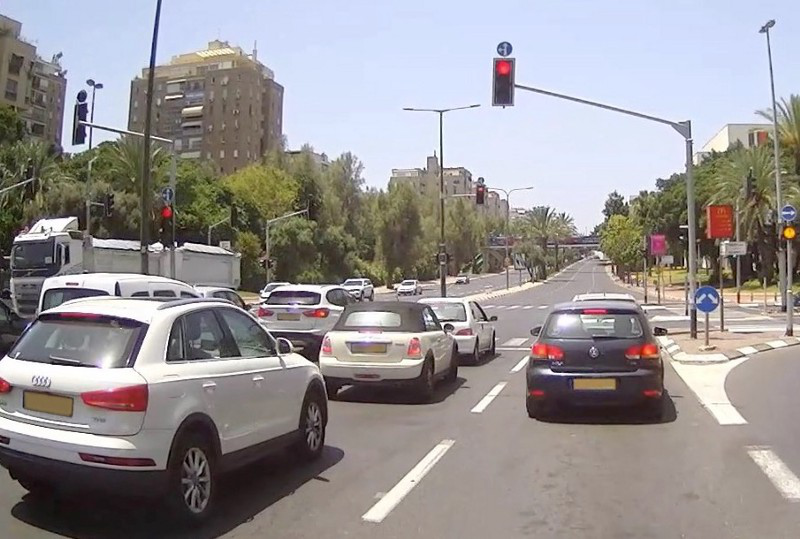

In [5]:
img_pil

In [6]:
img_pil.save('test_img.png')

In [7]:
name_img = 'test_img_2.png'
img_pil.rotate(180).save(name_img)

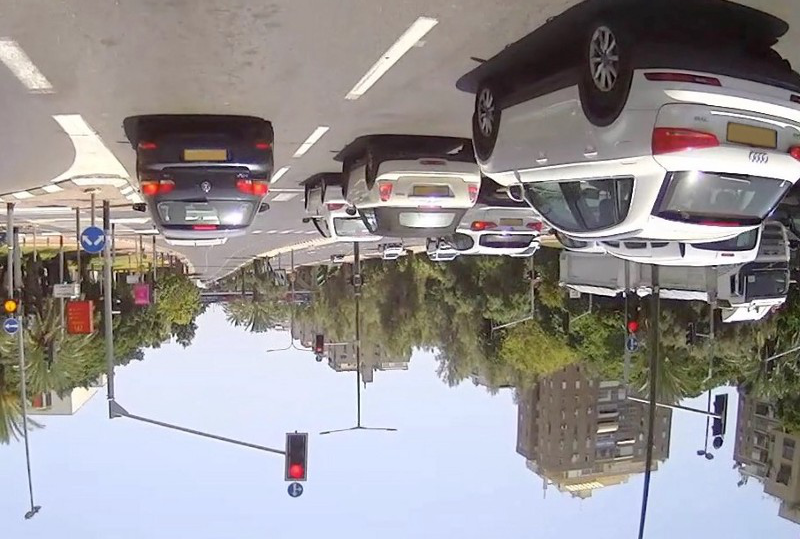

In [8]:
Image.open(name_img)

In [9]:
img_pil=Image.open(name_img)

In [10]:
type(response.content)

bytes

In [53]:
URL_APP = "http://derotate.com"
# URL_APP = "https://derotate.p.rapidapi.com"
# URL_APP = "http://localhost"


## Call the API with an image file

In [54]:
import requests
import json
files = {'file': open('test_img_2.png', 'rb')}
response = requests.request("POST", f'{URL_APP}/img2class/', files=files)
response.json()

{'result': 'rotated180'}

## Call the API with a URL

In [55]:
import requests
import json
params = {'url': URL_IMG}
response = requests.request("POST", f'{URL_APP}/urlimg2class/', params=params)
response.json()

{'result': 'straight'}

In [56]:
import requests

url = "https://derotate.p.rapidapi.com/img2class/"

files = {'file': open('test_img_2.png', 'rb')}

headers = {
    'x-rapidapi-host': "derotate.p.rapidapi.com",
    'x-rapidapi-key': "cf3fb89e35msh462a3a74b632f61p1bf082jsn2aea378d487b",
    'content-type': "multipart/form-data"
    }

response = requests.request("POST", url, files=files, headers=headers)

print(response.text)

{"detail":"There was an error parsing the body"}


In [41]:
import time
start = time.time()

# api-endpoint 
API_ENDPOINT = f"{URL_APP}/img2class/"
  
# data to be sent to api 
files = {'file': open(name_img, 'rb')}

# sending post request and saving response as response object 
r = requests.post(url = API_ENDPOINT, files=files) 

print(r.status_code)

end = time.time()
print(f"Time elapsed = {end-start}")
r.json()

200
Time elapsed = 3.2848305702209473


{'result': 'rotated180'}

## Call the API with the image directly

In [42]:
def image_to_byte_array(image:Image):
  imgByteArr = BytesIO()
  image.save(imgByteArr, format=image.format)
  imgByteArr = imgByteArr.getvalue()
  return imgByteArr

In [43]:
# img_bytes = response.content
img_bytes = image_to_byte_array(img_pil)
img_bytes_io = BytesIO(img_bytes)
type(img_bytes_io)

_io.BytesIO

In [44]:
type(open(name_img, 'rb'))

_io.BufferedReader

In [45]:
files = {'file':img_bytes_io}

# sending post request and saving response as response object 
r = requests.post(url = API_ENDPOINT, files=files) 

print(r.status_code)
r.json()

200


{'result': 'rotated180'}

## Test img2img API

In [46]:
import time
start = time.time()

# api-endpoint 
API_ENDPOINT = f"{URL_APP}/img2img/"

# data to be sent to api 
img_bytes = response.content 
files = {'file': open('test_img_2.png', 'rb')}

# sending post request and saving response as response object 
r = requests.post(url = API_ENDPOINT, files=files) 

print(r.status_code)

end = time.time()
print(f"Time elapsed = {end-start}")
# r.json()

200
Time elapsed = 5.175018787384033


In [47]:
type(BytesIO(r.content))

_io.BytesIO

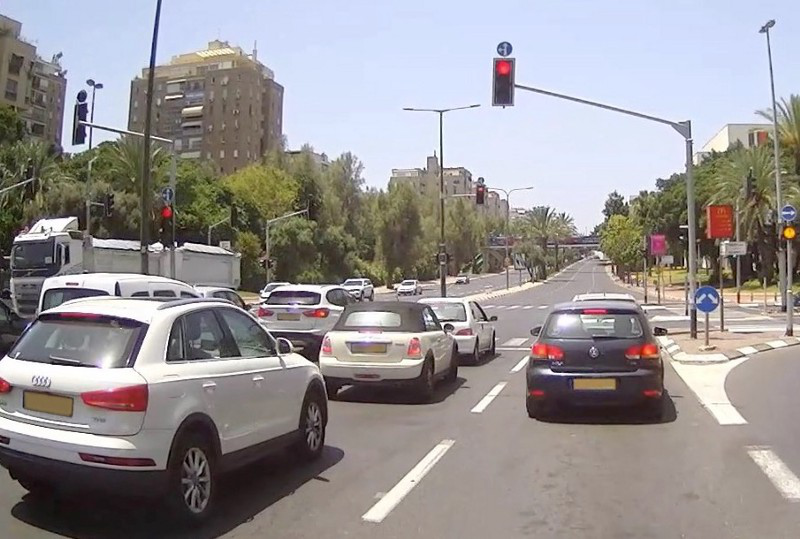

In [48]:
dataBytesIO = BytesIO(r.content)
Image.open(dataBytesIO)

## Test urlimg2img API

In [49]:
import time
start = time.time()

# api-endpoint 
API_ENDPOINT = f"{URL_APP}/urlimg2img/"

# data to be sent to api 
params = {'url': URL_IMG}

# sending post request and saving response as response object 
r = requests.post(url = API_ENDPOINT, params=params) 

print(r.status_code)

end = time.time()
print(f"Time elapsed = {end-start}")
# r.json()

200
Time elapsed = 2.067315101623535


In [50]:
type(BytesIO(r.content))

_io.BytesIO

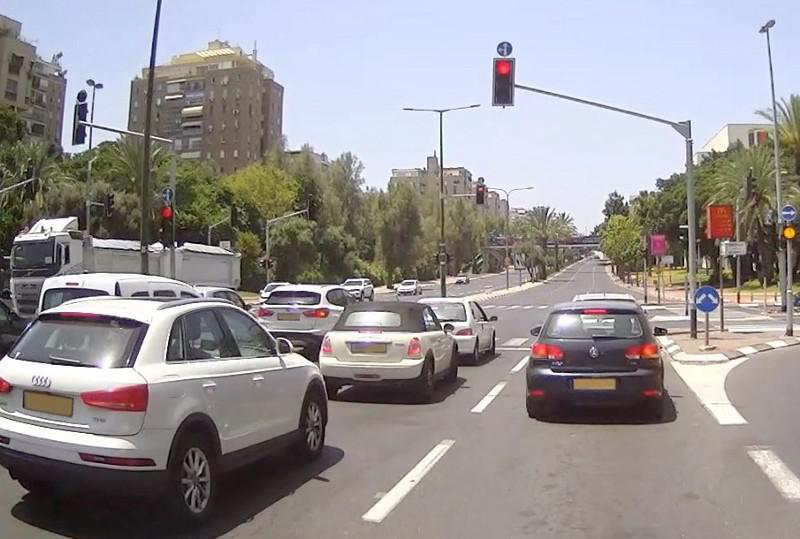

In [51]:
dataBytesIO = BytesIO(r.content)
Image.open(dataBytesIO)